In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [2]:
X = loadmat('PaviaU.mat')['paviaU']
y = loadmat('PaviaU_gt.mat')['paviaU_gt']

In [3]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (610, 340, 103)
y: (610, 340)


In [4]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

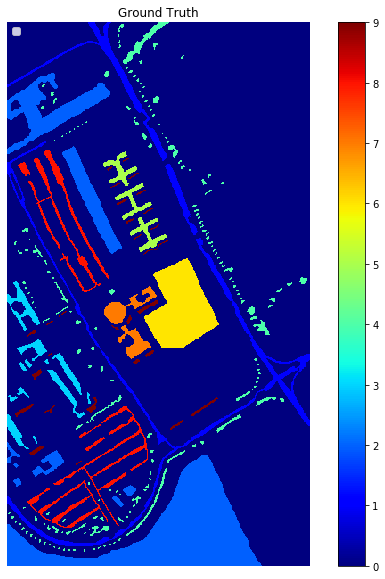

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], loc='upper left')
#plt.savefig('ground_truth.png')
plt.show()

In [6]:
_,F,S = X.shape
print(F,"  ",S)

340    103


In [7]:
D1= X[:,:,0:36] 
print(D1.shape)
D2= X[:,:,36:76] 
print(D2.shape)
D3= X[:,:,76:] 
print(D3.shape)

(610, 340, 36)
(610, 340, 40)
(610, 340, 27)


In [8]:
_,F1,S1 = D1.shape
_,F2,S2 = D2.shape
_,F3,S3 = D3.shape
print(F1,"  ",S1)
print(F2,"  ",S2)
print(F3,"  ",S3)

340    36
340    40
340    27


In [9]:
M = X.T.mean(axis=0)
M.shape

(340, 610)

In [10]:
M=M.T;
M.shape

(610, 340)

In [11]:
M1=D1.T.mean(axis=0)
M1.shape

(340, 610)

In [12]:
M1=M1.T;
M1.shape

(610, 340)

In [13]:
M2=D2.T.mean(axis=0)
M2.shape

(340, 610)

In [14]:
M2=M2.T;
M2.shape

(610, 340)

In [15]:
M3=D3.T.mean(axis=0)
M3.shape

(340, 610)

In [16]:
M3=M3.T;
M3.shape

(610, 340)

In [17]:
np.stack([M1 for _ in range(S1)], axis=2).shape

(610, 340, 36)

In [18]:
I1 = (D1 - np.stack([M1 for _ in range(S1)], axis=2)); 
I1 = I1.reshape(I1.shape[0]*I1.shape[1], I1.shape[2])
I1.shape

(207400, 36)

In [19]:
I2 = (D2 - np.stack([M2 for _ in range(S2)], axis=2)); 
I2 = I2.reshape(I2.shape[0]*I2.shape[1], I2.shape[2])
I2.shape

(207400, 40)

In [20]:
I3 = (D3 - np.stack([M3 for _ in range(S3)], axis=2)); 
I3 = I3.reshape(I3.shape[0]*I3.shape[1], I3.shape[2])
I3.shape

(207400, 27)

In [21]:
def applyPCA(X, numComponents, isReshape = True, drawPlot = False, layerNo = 1):
    if isReshape == True:
        newX = np.reshape(X, (-1, X.shape[2]))
        pca = PCA(n_components=numComponents, whiten=True)
        newX = pca.fit_transform(newX)
        newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    else: 
        pca = PCA(n_components=numComponents, svd_solver='full')
        newX = pca.fit_transform(X)
        if drawPlot == True:
            drawPCAPlot(pca.explained_variance_ratio_,numComponents, layerNo)
    return newX, pca.explained_variance_ratio_

In [22]:
SX1,pca1 = applyPCA(I1,numComponents = 0.99,isReshape = False)
SX1.shape

(207400, 14)

In [23]:
SX2,pca2 = applyPCA(I2,numComponents = 0.99,isReshape = False)
SX2.shape

(207400, 4)

In [24]:
SX3,pca3 = applyPCA(I3,numComponents = 0.99,isReshape = False)
SX3.shape

(207400, 11)

In [25]:
SX= np.concatenate([SX1.T,SX2.T,SX3.T])
SX = SX.T
SX.shape

(207400, 29)

In [26]:
pca1

array([0.58959249, 0.24414814, 0.05682211, 0.03068244, 0.01623541,
       0.01578731, 0.01038694, 0.00750197, 0.00551206, 0.00414083,
       0.00341495, 0.0026966 , 0.00220566, 0.00192146])

In [27]:
pca_var = []
pca_var = np.concatenate([pca1,pca2,pca3])
pca_var = sorted(pca_var, reverse = True)
MAX = max(np.cumsum(pca_var))
pca_var = np.round((pca_var)/MAX,3)
np.cumsum(pca_var)

array([0.276, 0.497, 0.695, 0.777, 0.851, 0.901, 0.92 , 0.936, 0.946,
       0.953, 0.959, 0.964, 0.969, 0.974, 0.977, 0.98 , 0.983, 0.985,
       0.987, 0.989, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997,
       0.998, 0.999])

[0.276 0.221 0.198 0.082 0.074 0.05  0.019 0.016 0.01  0.007 0.006 0.005
 0.005 0.005 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001]


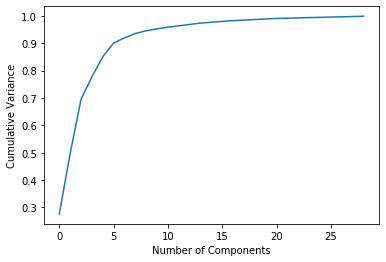

In [28]:
print(pca_var)
plt.figure()
plt.plot(np.cumsum(pca_var))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance') #for each component
#plt.title('Pavia University Dataset Explained Variance')
plt.savefig('Pavia_University_explainedvariance_final1')
plt.show()

In [29]:
y = y.ravel()

In [30]:
print(SX.shape)
print(y.shape)

(207400, 29)
(207400,)


In [31]:
X = (SX[y>0,:])
Y = (y[y>0])

In [32]:
print(X.shape)
print(Y.shape)

(42776, 29)
(42776,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.25, stratify=Y )

In [34]:
print(X_train.shape)
print(X_test.shape)

(32082, 29)
(10694, 29)


In [35]:
label_tr,counts_tr=np.unique(y_train,return_counts=True)
label_te,counts_te=np.unique(y_test,return_counts=True)
print(pd.DataFrame(counts_tr,label_tr))
print(pd.DataFrame(counts_te,label_te))

       0
1   4973
2  13987
3   1574
4   2298
5   1009
6   3772
7    997
8   2762
9    710
      0
1  1658
2  4662
3   525
4   766
5   336
6  1257
7   333
8   920
9   237


In [36]:
#Applying Scalar to train and test Dataset

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
#Appplying SVM 

from sklearn.svm import SVC
from sklearn import metrics

In [38]:
classifiers = []

Train_acc=[]
Valid_acc=[]
accuracy = -1
accuracy_train = -1
for C in np.arange(1,102,25):
    for gamma in np.arange(0.001,0.1,0.005):
        
        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train =metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)
        if (acc_train>accuracy_train):
            
            accuracy_train=acc_train
            best_c_train = C
            best_g_train=gamma
        print("C_train= ",C," Best C_train = ",best_c_train," gamma_train = ",gamma," best_gamma_train= ",best_g_train," Accuracy_train = ",acc_train," Best Accuracy_train = ",accuracy_train,"\n")

        if (acc>accuracy):
            accuracy=acc
            best_c = C
            best_g=gamma
        
        print("C= ",C," Best C = ",best_c," gamma = ",gamma," best_gamma= ",best_g," Accuracy = ",acc," Best Accuracy = ",accuracy,"\n")
        
        

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.001  best_gamma_train=  0.001  Accuracy_train =  0.8376036406707811  Best Accuracy_train =  0.8376036406707811 

C=  1  Best C =  1  gamma =  0.001  best_gamma=  0.001  Accuracy =  0.8342060968767533  Best Accuracy =  0.8342060968767533 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.006  best_gamma_train=  0.006  Accuracy_train =  0.8884421170749953  Best Accuracy_train =  0.8884421170749953 

C=  1  Best C =  1  gamma =  0.006  best_gamma=  0.006  Accuracy =  0.8797456517673462  Best Accuracy =  0.8797456517673462 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.011  best_gamma_train=  0.011  Accuracy_train =  0.9089832304719158  Best Accuracy_train =  0.9089832304719158 

C=  1  Best C =  1  gamma =  0.011  best_gamma=  0.011  Accuracy = 

C_train=  26  Best C_train =  1  gamma_train =  0.016  best_gamma_train=  0.096  Accuracy_train =  0.9718845458512562  Best Accuracy_train =  0.9762795336949068 

C=  26  Best C =  26  gamma =  0.016  best_gamma=  0.011  Accuracy =  0.9278099869085469  Best Accuracy =  0.9289321114643726 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.021  best_gamma_train=  0.021  Accuracy_train =  0.9809238825509632  Best Accuracy_train =  0.9809238825509632 

C=  26  Best C =  26  gamma =  0.021  best_gamma=  0.011  Accuracy =  0.9247241443800261  Best Accuracy =  0.9289321114643726 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.026000000000000002  best_gamma_train=  0.026000000000000002  Accuracy_train =  0.9877501402655695  Best Accuracy_train =  0.9877501402655695 

C=  26  Best C =  26  gamma =  0.026000000000000002  best_gamma=  0.011  Accuracy =  0.921638

C_train=  51  Best C_train =  26  gamma_train =  0.031  best_gamma_train=  0.07100000000000001  Accuracy_train =  0.9975999002555951  Best Accuracy_train =  1.0 

C=  51  Best C =  26  gamma =  0.031  best_gamma=  0.011  Accuracy =  0.9153731064148121  Best Accuracy =  0.9289321114643726 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.036000000000000004  best_gamma_train=  0.07100000000000001  Accuracy_train =  0.9987531949379714  Best Accuracy_train =  1.0 

C=  51  Best C =  26  gamma =  0.036000000000000004  best_gamma=  0.011  Accuracy =  0.9137834299607256  Best Accuracy =  0.9289321114643726 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.041  best_gamma_train=  0.07100000000000001  Accuracy_train =  0.9995324481017392  Best Accuracy_train =  1.0 

C=  51  Best C =  26  gamma =  0.041  best_gamma=  0.011  Accuracy =  0.9125677950252478  Best 

C_train=  76  Best C_train =  26  gamma_train =  0.046  best_gamma_train=  0.07100000000000001  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  26  gamma =  0.046  best_gamma=  0.011  Accuracy =  0.9111651393304657  Best Accuracy =  0.9289321114643726 

----------------------------------------------------------------
C_train=  76  Best C_train =  26  gamma_train =  0.051000000000000004  best_gamma_train=  0.07100000000000001  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  26  gamma =  0.051000000000000004  best_gamma=  0.011  Accuracy =  0.910697587432205  Best Accuracy =  0.9289321114643726 

----------------------------------------------------------------
C_train=  76  Best C_train =  26  gamma_train =  0.056  best_gamma_train=  0.07100000000000001  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  26  gamma =  0.056  best_gamma=  0.011  Accuracy =  0.9108846081915093  Best Accuracy =  0.9289321114643726 

-------------

C_train=  101  Best C_train =  26  gamma_train =  0.066  best_gamma_train=  0.07100000000000001  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  101  gamma =  0.066  best_gamma=  0.006  Accuracy =  0.9099495043949879  Best Accuracy =  0.9294931737422854 

----------------------------------------------------------------
C_train=  101  Best C_train =  26  gamma_train =  0.07100000000000001  best_gamma_train=  0.07100000000000001  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  101  gamma =  0.07100000000000001  best_gamma=  0.006  Accuracy =  0.9095754628763792  Best Accuracy =  0.9294931737422854 

----------------------------------------------------------------
C_train=  101  Best C_train =  26  gamma_train =  0.076  best_gamma_train=  0.07100000000000001  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  101  gamma =  0.076  best_gamma=  0.006  Accuracy =  0.9094819524967271  Best Accuracy =  0.9294931737422854 

-----

In [40]:
clf = SVC(C=101,gamma=0.006,decision_function_shape='ovo')

In [41]:
clf.fit(X_train, y_train)

SVC(C=101, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.006, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy : 92.94931737422854


In [44]:
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)

Cohen Kappa Score : 90.62601890454405


In [45]:
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
print(confusion_matrix(y_test, y_pred ))

[[1539    4   19    0    0    1   32   47   16]
 [   0 4567    0   23    0   69    0    3    0]
 [  12    0  371    0    0    0    0  142    0]
 [   0   30    0  733    0    3    0    0    0]
 [   0    0    0    0  336    0    0    0    0]
 [   4  118    0    3    0 1130    0    2    0]
 [  67    0    0    0    0    0  259    7    0]
 [  54    7   73    0    0    5    1  780    0]
 [  12    0    0    0    0    0    0    0  225]]


In [46]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           1       0.91      0.93      0.92      1658
           2       0.97      0.98      0.97      4662
           3       0.80      0.71      0.75       525
           4       0.97      0.96      0.96       766
           5       1.00      1.00      1.00       336
           6       0.94      0.90      0.92      1257
           7       0.89      0.78      0.83       333
           8       0.80      0.85      0.82       920
           9       0.93      0.95      0.94       237

    accuracy                           0.93     10694
   macro avg       0.91      0.89      0.90     10694
weighted avg       0.93      0.93      0.93     10694

